<a href="https://colab.research.google.com/github/javiase/Grupo27-Practica1/blob/main/TrabajoFinalAA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importacion de herramientas

Para comenzar realizaremos todas las importaciones necesarias

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn import preprocessing
from sklearn.compose import make_column_selector as selector
from sympy import *
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler



#traintest
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error


#decisiontrees
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor


#knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor


#crossval
from sklearn.model_selection import cross_val_score, KFold

#GridSearch/RandomSearch
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#pipeline
from sklearn.pipeline import make_pipeline




# 1. Importacion modelo de datos y Analisis exploratorio de datos

## Implementar modelo de datos

Implementamos el modelo de datos


In [133]:
datos = pd.read_csv("disp_st27ns1.txt.bz2", compression="bz2",index_col=0)
#comp_df = pd.read_csv("comp_st27ns1.txt.bz2",compression="bz2",index_col=0)

In [134]:
pd.options.display.max_rows = 100
datos

,apcp_sf1_1,apcp_sf2_1,apcp_sf3_1,apcp_sf4_1,apcp_sf5_1,dlwrf_s1_1,dlwrf_s2_1,dlwrf_s3_1,dlwrf_s4_1,dlwrf_s5_1,...,ulwrf_t2_1,ulwrf_t3_1,ulwrf_t4_1,ulwrf_t5_1,uswrf_s1_1,uswrf_s2_1,uswrf_s3_1,uswrf_s4_1,uswrf_s5_1,salida
V1,0.000000,0.000000,0.000000,0.000000,0.000000,279.583582,244.150732,248.810849,260.377672,257.922896,...,246.504475,250.123907,256.887859,252.522390,0.0,10.000000,46.545455,96.000000,63.000000,10814100
V2,0.000000,0.000000,0.010000,0.056364,0.332727,241.907687,273.096852,289.982095,317.169015,309.656355,...,205.821899,202.754549,190.833872,193.689280,0.0,3.909091,17.909091,35.909091,24.000000,3524700
V3,0.372727,0.021818,0.044545,0.010000,0.007273,266.370911,248.814203,253.860367,269.438213,262.840130,...,232.919646,234.298932,207.450058,201.529466,0.0,14.727273,78.363636,156.818182,99.090909,2262300
V4,0.002727,0.004545,0.000000,0.000000,0.000000,246.863048,254.987450,253.493584,243.910921,238.531321,...,231.098594,234.944027,247.745764,241.867405,0.0,7.545455,38.727273,93.909091,62.363636,2414100
V5,0.000000,0.000000,0.000000,0.000000,0.000000,225.253657,233.381596,241.669004,262.122700,262.209190,...,228.161205,229.680077,246.582735,245.473409,0.0,9.454545,44.454545,94.818182,62.363636,8925600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V4376,0.103636,0.031818,0.275455,1.363636,2.723636,290.259560,273.578697,290.364211,336.500117,329.825229,...,244.348444,237.416203,184.462400,184.607586,0.0,7.454545,29.363636,26.181818,16.181818,2586300
V4377,0.042727,0.011818,0.005455,0.000000,0.000000,281.187456,270.918392,261.076105,257.875871,255.614019,...,245.674612,249.425982,259.792969,256.932908,0.0,12.181818,57.909091,118.363636,75.909091,7096500
V4378,0.000000,0.000000,0.000000,0.000000,0.000000,258.991619,266.566642,270.990501,285.661122,282.533206,...,227.978506,236.917554,268.096311,269.024766,0.0,8.272727,44.454545,94.909091,61.909091,10694700
V4379,0.000000,0.000000,0.000000,0.000000,0.000000,267.316595,263.072063,271.107649,292.155748,289.533175,...,262.343628,256.254039,263.650323,268.711556,0.0,10.909091,46.181818,94.363636,61.727273,11154900


In [135]:
count = 0
datos['apcp_sf1_1']
ceros = (datos['apcp_sf1_1']==0).sum()
ceros

2534

Como se puede apreciar en la tabla la columna "uswrf_s1_1",  contiene 2534 ceros. Es más de la mitad, por lo que se procederá a eliminar dicha columna

In [136]:
datos.drop(['uswrf_s1_1'], axis=1)

,apcp_sf1_1,apcp_sf2_1,apcp_sf3_1,apcp_sf4_1,apcp_sf5_1,dlwrf_s1_1,dlwrf_s2_1,dlwrf_s3_1,dlwrf_s4_1,dlwrf_s5_1,...,ulwrf_t1_1,ulwrf_t2_1,ulwrf_t3_1,ulwrf_t4_1,ulwrf_t5_1,uswrf_s2_1,uswrf_s3_1,uswrf_s4_1,uswrf_s5_1,salida
V1,0.000000,0.000000,0.000000,0.000000,0.000000,279.583582,244.150732,248.810849,260.377672,257.922896,...,192.516803,246.504475,250.123907,256.887859,252.522390,10.000000,46.545455,96.000000,63.000000,10814100
V2,0.000000,0.000000,0.010000,0.056364,0.332727,241.907687,273.096852,289.982095,317.169015,309.656355,...,231.473054,205.821899,202.754549,190.833872,193.689280,3.909091,17.909091,35.909091,24.000000,3524700
V3,0.372727,0.021818,0.044545,0.010000,0.007273,266.370911,248.814203,253.860367,269.438213,262.840130,...,210.473835,232.919646,234.298932,207.450058,201.529466,14.727273,78.363636,156.818182,99.090909,2262300
V4,0.002727,0.004545,0.000000,0.000000,0.000000,246.863048,254.987450,253.493584,243.910921,238.531321,...,227.330324,231.098594,234.944027,247.745764,241.867405,7.545455,38.727273,93.909091,62.363636,2414100
V5,0.000000,0.000000,0.000000,0.000000,0.000000,225.253657,233.381596,241.669004,262.122700,262.209190,...,229.641681,228.161205,229.680077,246.582735,245.473409,9.454545,44.454545,94.818182,62.363636,8925600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V4376,0.103636,0.031818,0.275455,1.363636,2.723636,290.259560,273.578697,290.364211,336.500117,329.825229,...,224.630457,244.348444,237.416203,184.462400,184.607586,7.454545,29.363636,26.181818,16.181818,2586300
V4377,0.042727,0.011818,0.005455,0.000000,0.000000,281.187456,270.918392,261.076105,257.875871,255.614019,...,245.591119,245.674612,249.425982,259.792969,256.932908,12.181818,57.909091,118.363636,75.909091,7096500
V4378,0.000000,0.000000,0.000000,0.000000,0.000000,258.991619,266.566642,270.990501,285.661122,282.533206,...,240.584692,227.978506,236.917554,268.096311,269.024766,8.272727,44.454545,94.909091,61.909091,10694700
V4379,0.000000,0.000000,0.000000,0.000000,0.000000,267.316595,263.072063,271.107649,292.155748,289.533175,...,268.409674,262.343628,256.254039,263.650323,268.711556,10.909091,46.181818,94.363636,61.727273,11154900


Queremos mostrar todos los datos en una gráfica

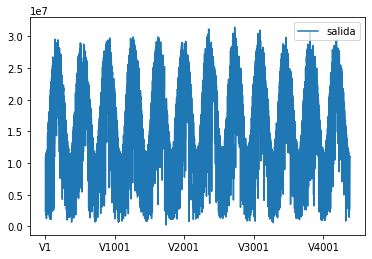

In [137]:
# Crear el gráfico
datos[['salida']].plot()
# Mostrar el gráfico
plt.show()

## Comprobar valores nulos

A continuacion comprobaremos si existen valores nulos en alguna de las columnas

In [138]:
datos.isnull().sum()

apcp_sf1_1    0
apcp_sf2_1    0
apcp_sf3_1    0
apcp_sf4_1    0
apcp_sf5_1    0
dlwrf_s1_1    0
dlwrf_s2_1    0
dlwrf_s3_1    0
dlwrf_s4_1    0
dlwrf_s5_1    0
dswrf_s1_1    0
dswrf_s2_1    0
dswrf_s3_1    0
dswrf_s4_1    0
dswrf_s5_1    0
pres_ms1_1    0
pres_ms2_1    0
pres_ms3_1    0
pres_ms4_1    0
pres_ms5_1    0
pwat_ea1_1    0
pwat_ea2_1    0
pwat_ea3_1    0
pwat_ea4_1    0
pwat_ea5_1    0
spfh_2m1_1    0
spfh_2m2_1    0
spfh_2m3_1    0
spfh_2m4_1    0
spfh_2m5_1    0
tcdc_ea1_1    0
tcdc_ea2_1    0
tcdc_ea3_1    0
tcdc_ea4_1    0
tcdc_ea5_1    0
tcolc_e1_1    0
tcolc_e2_1    0
tcolc_e3_1    0
tcolc_e4_1    0
tcolc_e5_1    0
tmax_2m1_1    0
tmax_2m2_1    0
tmax_2m3_1    0
tmax_2m4_1    0
tmax_2m5_1    0
tmin_2m1_1    0
tmin_2m2_1    0
tmin_2m3_1    0
tmin_2m4_1    0
tmin_2m5_1    0
tmp_2m_1_1    0
tmp_2m_2_1    0
tmp_2m_3_1    0
tmp_2m_4_1    0
tmp_2m_5_1    0
tmp_sfc1_1    0
tmp_sfc2_1    0
tmp_sfc3_1    0
tmp_sfc4_1    0
tmp_sfc5_1    0
ulwrf_s1_1    0
ulwrf_s2_1    0
ulwrf_s3

## Comprobar filas duplicadas

Vamos a comprobar si hay filas duplicadas:




In [139]:
datos.duplicated()

V1       False
V2       False
V3       False
V4       False
V5       False
         ...  
V4376    False
V4377    False
V4378    False
V4379    False
V4380    False
Length: 4380, dtype: bool

Se puede ver, que no hay ninguna fila duplicada, lo cual es buena señal

## Comprobar correlacion entre las variables y la salida, y entre las variables entre si

A continuación construimos la matriz de correlación para ver qué relevante es cada variable en la salida y para comprobar que dos variables no tengan un comportamiento muy similar(ante lo cual se eliminaría una de ellas) y con su mapa de calor, para verla mejor


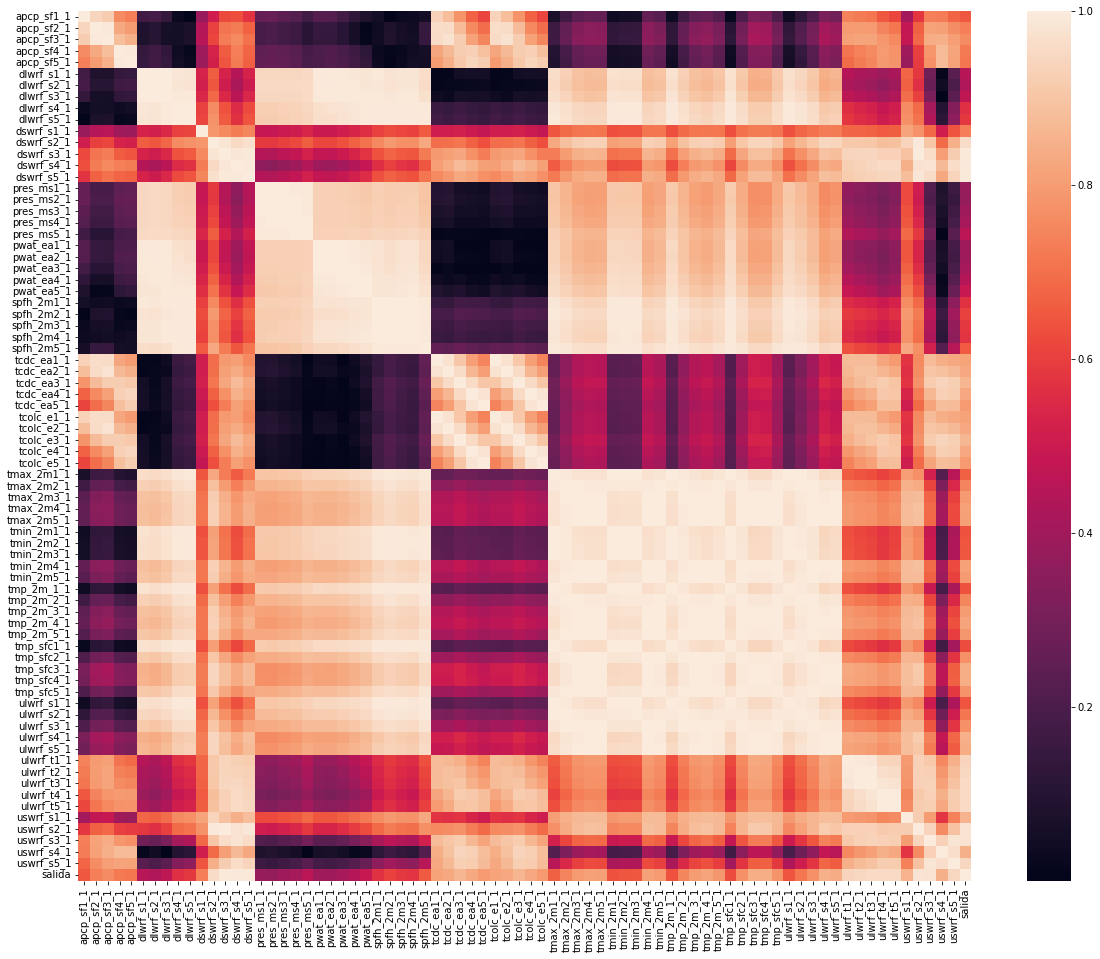

In [140]:
correlacion = datos.corr()
plt.figure(figsize=(20, 16))
plot = sns.heatmap(correlacion.corr().abs())


Limitamos la matriz al triangulo superior 

In [141]:
upper= correlacion.where(np.triu(np.ones(correlacion.shape), k=1).astype(np.bool))
upper

<ipython-input-141-dada363a1d0c>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper= correlacion.where(np.triu(np.ones(correlacion.shape), k=1).astype(np.bool))


,apcp_sf1_1,apcp_sf2_1,apcp_sf3_1,apcp_sf4_1,apcp_sf5_1,dlwrf_s1_1,dlwrf_s2_1,dlwrf_s3_1,dlwrf_s4_1,dlwrf_s5_1,...,ulwrf_t2_1,ulwrf_t3_1,ulwrf_t4_1,ulwrf_t5_1,uswrf_s1_1,uswrf_s2_1,uswrf_s3_1,uswrf_s4_1,uswrf_s5_1,salida
apcp_sf1_1,NaN,0.601748,0.543781,0.277655,0.262666,0.264907,0.223553,0.190142,0.102332,0.085999,...,-0.357093,-0.311504,-0.172070,-0.150134,-0.067118,-0.188936,-0.244583,-0.158497,-0.130785,-0.210803
apcp_sf2_1,NaN,NaN,0.944655,0.403267,0.375560,0.218167,0.225368,0.200207,0.125191,0.110740,...,-0.422966,-0.403418,-0.265629,-0.229809,-0.057603,-0.220824,-0.316501,-0.246168,-0.207139,-0.234712
apcp_sf3_1,NaN,NaN,NaN,0.549341,0.485724,0.225110,0.237400,0.214085,0.138392,0.123163,...,-0.431491,-0.427810,-0.325865,-0.286692,-0.044330,-0.223966,-0.342563,-0.298344,-0.253546,-0.261290
apcp_sf4_1,NaN,NaN,NaN,NaN,0.898837,0.214020,0.236931,0.226005,0.180157,0.168973,...,-0.315838,-0.338565,-0.374480,-0.374391,0.007243,-0.137082,-0.252470,-0.312784,-0.281925,-0.257081
apcp_sf5_1,NaN,NaN,NaN,NaN,NaN,0.213648,0.238394,0.227495,0.189047,0.181595,...,-0.320049,-0.347333,-0.389766,-0.404853,-0.000891,-0.145067,-0.256692,-0.320720,-0.299890,-0.268527
dlwrf_s1_1,NaN,NaN,NaN,NaN,NaN,NaN,0.966002,0.953568,0.891560,0.877920,...,0.205955,0.209102,0.200702,0.230811,0.303236,0.377124,0.120764,-0.054888,0.117347,0.218264
dlwrf_s2_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.993317,0.933113,0.919404,...,0.186767,0.183973,0.172107,0.204012,0.325223,0.367840,0.086127,-0.094005,0.087518,0.213598
dlwrf_s3_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.964093,0.952146,...,0.226316,0.219289,0.194408,0.225850,0.347867,0.423130,0.129628,-0.079860,0.107742,0.257677
dlwrf_s4_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.996835,...,0.310307,0.300991,0.238058,0.262453,0.382675,0.538780,0.250681,-0.039036,0.149881,0.355938
dlwrf_s5_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.322502,0.313870,0.247906,0.266319,0.392027,0.561208,0.279531,-0.014985,0.169544,0.380239


Vamos a crear un diccionario que contenga cada columna, y las columnas con las que ésta está correlacionada

In [142]:
# Crea un diccionario para almacenar las columnas correlacionadas
correlaciones = {}

# Recorre las columnas del DataFrame
for col in datos.columns:
    # Calcula la correlación de la columna actual con las demás columnas
    corr = datos.corrwith(datos[col])

    # Crea una lista de índices de las columnas correlacionadas
    correlacion_idx = corr[(corr > 0.95) & (corr.index != col)].index.tolist()

    # Asigna la lista de índices como valor para la clave correspondiente
    correlaciones[col] = correlacion_idx

# Imprime el diccionario con saltos de línea
for k, v in correlaciones.items():
    print(f"{k}: {v}\n")

apcp_sf1_1: []

apcp_sf2_1: []

apcp_sf3_1: []

apcp_sf4_1: []

apcp_sf5_1: []

dlwrf_s1_1: ['dlwrf_s2_1', 'dlwrf_s3_1']

dlwrf_s2_1: ['dlwrf_s1_1', 'dlwrf_s3_1']

dlwrf_s3_1: ['dlwrf_s1_1', 'dlwrf_s2_1', 'dlwrf_s4_1', 'dlwrf_s5_1']

dlwrf_s4_1: ['dlwrf_s3_1', 'dlwrf_s5_1']

dlwrf_s5_1: ['dlwrf_s3_1', 'dlwrf_s4_1']

dswrf_s1_1: []

dswrf_s2_1: ['dswrf_s3_1', 'uswrf_s2_1']

dswrf_s3_1: ['dswrf_s2_1', 'uswrf_s2_1']

dswrf_s4_1: ['dswrf_s5_1']

dswrf_s5_1: ['dswrf_s4_1']

pres_ms1_1: ['pres_ms2_1', 'pres_ms3_1']

pres_ms2_1: ['pres_ms1_1', 'pres_ms3_1', 'pres_ms4_1']

pres_ms3_1: ['pres_ms1_1', 'pres_ms2_1', 'pres_ms4_1', 'pres_ms5_1']

pres_ms4_1: ['pres_ms2_1', 'pres_ms3_1', 'pres_ms5_1']

pres_ms5_1: ['pres_ms3_1', 'pres_ms4_1']

pwat_ea1_1: ['pwat_ea2_1', 'pwat_ea3_1']

pwat_ea2_1: ['pwat_ea1_1', 'pwat_ea3_1', 'pwat_ea4_1']

pwat_ea3_1: ['pwat_ea1_1', 'pwat_ea2_1', 'pwat_ea4_1', 'pwat_ea5_1']

pwat_ea4_1: ['pwat_ea2_1', 'pwat_ea3_1', 'pwat_ea5_1']

pwat_ea5_1: ['pwat_ea3_1', 'pwat_ea4

Vamos a ver las 5 que tengan más correlacion con la variable de salida


 

In [143]:
# Seleccionar la columna de salida
salida = "salida"
# Seleccionar las 5 columnas con mayor correlación con la columna de salida
mas_corr = abs(correlacion[salida]).sort_values(ascending=False)[1:6]

# Mostrar las columnas seleccionadas
print(mas_corr)


dswrf_s3_1    0.865622
dswrf_s5_1    0.862388
dswrf_s4_1    0.857635
uswrf_s2_1    0.836513
dswrf_s2_1    0.817543
Name: salida, dtype: float64


Tras realizar a mano, las comprobaciones de las columnas que estaban correlacionadas, y tras eliminar una de las 2 que estuvieran correlacionadas, se traslado dicho procedimiento a código

In [144]:
# Lista de columnas a eliminar
cols_to_drop = ['dlwrf_s2_1', 'dlwrf_s3_1', 'dlwrf_s5_1', 'dswrf_s2_1', 'dswrf_s5_1', 'pres_ms2_1', 'pres_ms3_1', 
                'pres_ms4_1', 'pwat_ea2_1', 'pwat_ea3_1', 'pwat_ea4_1', 'spfh_2m2_1', 'spfh_2m3_1', 'spfh_2m4_1', 
                'tcdc_ea1_1', 'tcdc_ea2_1', 'tcdc_ea3_1', 'tcdc_ea4_1', 'tcdc_ea5_1', 'ulwrf_t2_1', 'ulwrf_t4_1', 
                'uswrf_s2_1', 'uswrf_s4_1', 'tmax_2m2_1', 'tmp_2m_2_1', 'tmp_sfc2_1', 'ulwrf_s3_1', 'ulwrf_s2_1', 
                'tmax_2m3_1', 'tmax_2m4_1', 'tmax_2m5_1', 'tmin_2m4_1', 'tmin_2m5_1', 'tmax_2m1_1', 'tmin_2m2_1', 
                'tmin_2m3_1', 'tmp_sfc1_1', 'tmp_2m_3_1', 'tmp_2m_4_1', 'tmp_2m_5_1', 'tmp_sfc3_1', 'tmp_sfc4_1', 
                'tmp_sfc5_1', 'ulwrf_s4_1', 'ulwrf_s5_1', 'tmin_2m1_1', 'tmp_2m_1_1']

# Elimina las columnas especificadas
datos = datos.drop(cols_to_drop, axis=1)

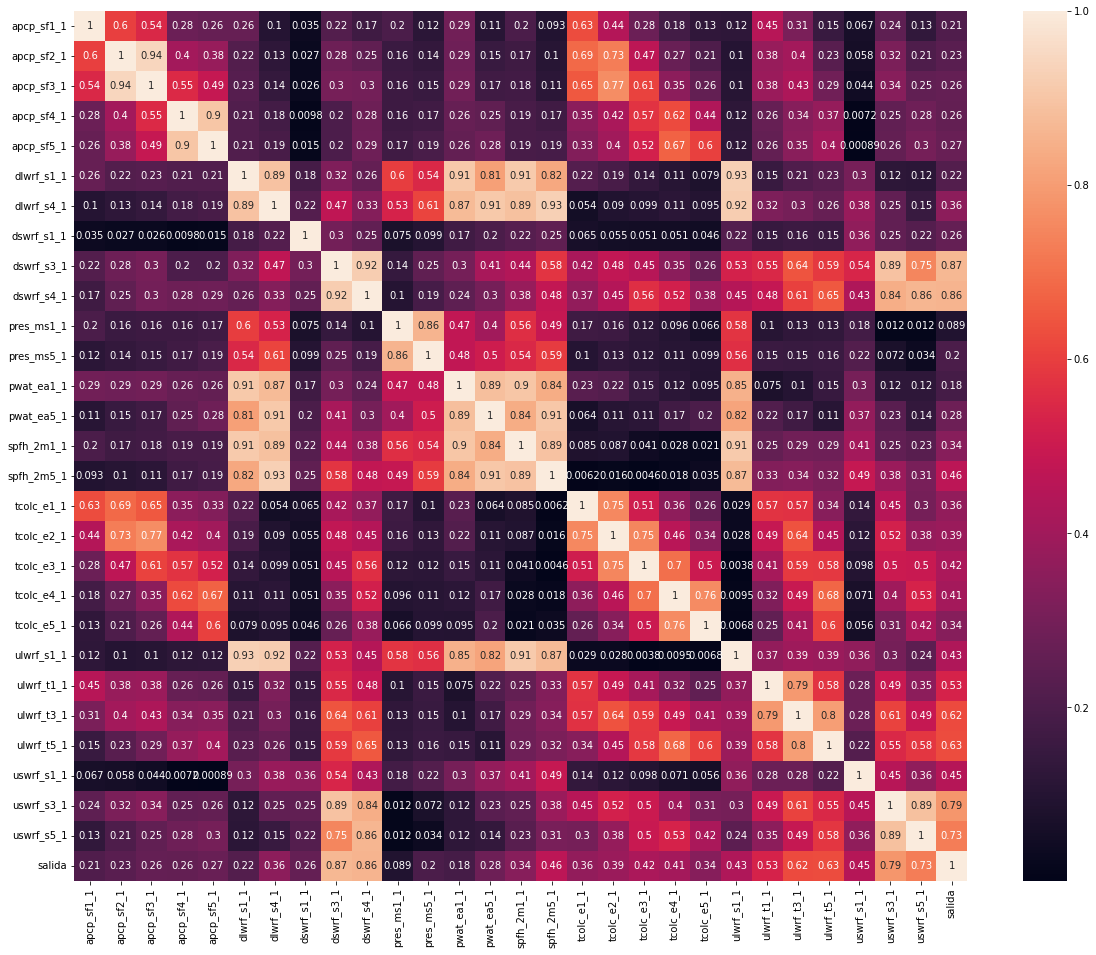

In [145]:
correlacion = datos.corr()
plt.figure(figsize=(20, 16))
plot = sns.heatmap(correlacion.abs(), annot = True)


A continuacion se volverá a mostrar la gráfica de los datos

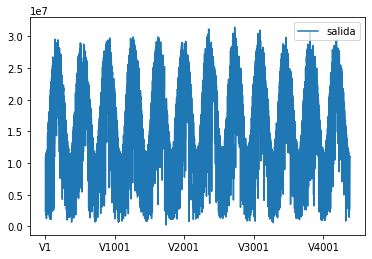

In [146]:
# Crear el gráfico
datos[['salida']].plot()

# Mostrar el gráfico
plt.show()

##Métodos básicos

#Division de los datos en train-test siendo train 10 años y test 2 años

In [147]:
X = datos[datos.columns[0:-1]]
y = datos['salida']

X_train = X[0:3650]
y_train = y[0:3650]


X_final_test = X[3651:]
y_final_test = y[3651:]


#KNN

A continuación se evaluará el modelo KNN con los hiperparámetros por omision

In [148]:
pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())

#En el modelo por omision, dividimos de nuevo el conjunto TRAIN en TRAIN TRAIN y TRAIN VAL
X_train_train = X[0:2920]
y_train_train = y[0:2920]

X_train_val = X[2920:3650]
y_train_val = y[2920:3650]

#ajustamos los datos a la pipeline 
pipe.fit(X_train_train, y_train_train)


# Predict on the scaled test data
y_pred = pipe.predict(X_train_val)

# Evaluate the model
rmse = np.sqrt(metrics.mean_squared_error(y_train_val, y_pred))
print(f"RMSE of the tree: {rmse}")
mae = mean_absolute_error(y_train_val, y_pred)
print(f"MAE del modelo KNN: {mae}")



RMSE of the tree: 3672265.973420247
MAE del modelo KNN: 2572597.0882191784


A continuacion comprobaremos KNN con varios hiperpárametros diferentes


In [154]:
pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())

arr = [-1]*2921 + [0]*730

# Define la lista de posibles valores de vecinos
vecinos = [1, 3, 5, 7, 9]

# Utiliza un bucle para evaluar el modelo con diferentes valores de vecinos

inner = PredefinedSplit(test_fold = arr)

# Definition of a 2-step process that self-adjusts 2 hyperpars
regr = GridSearchCV(pipe, 
                   param_grid = vecinos,
                   scoring='neg_mean_squared_error',
                   cv=inner, 
                   n_jobs=1, verbose=1)

# Entrena el modelo con el número óptimo de vecinos y evalúa en el conjunto de evaluación

y_pred = knn.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(f"RMSE del modelo KNN {rmse}")
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE del modelo KNN: {mae}")

RMSE del modelo KNN con 13 vecinos: 3322284.5217428436
MAE del modelo KNN: 2476693.970073762


Hemos realizado la cross validation probando con una lista de vecinos, en la cual el numero mas alto era 9. Al haber sido este, el mejor valor para los vecinos propuestos, procedemos a aumentar los numeros de la lista, esperando encontrar un número mayor más óptimo


In [ ]:
# Define la lista de posibles valores de vecinos
vecinos = [9, 12, 13, 14, 15, 16, 17, 18, 19, 20]
folds = [2,3,4,5,6,7,8,9,10]

# Utiliza un bucle para evaluar el modelo con diferentes valores de vecinos
mejor_puntuacion = 0
mejores_vecinos = 0

for n in vecinos:
  knn = KNeighborsRegressor(n_neighbors=n)
  scores = cross_val_score(knn, X_train, y_train, cv=5)
  mean_score = scores.mean()
  if mean_score > mejor_puntuacion:
      mejor_puntuacion = mean_score
      mejores_vecinos = n


# Entrena el modelo con el número óptimo de vecinos y evalúa en el conjunto de evaluación
knn = KNeighborsRegressor(n_neighbors=mejores_vecinos)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(f"RMSE del modelo KNN con {mejores_vecinos} vecinos: {rmse}")
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE del modelo KNN: {mae}")

Con esta nueva lista de posibles vecinos con 5 folds, se puede ver que el numero optimo de vecinos es 13.




#Arboles de decisión

A continuación se evaluará el modelo KNN con los hiperparámetros por omision

In [ ]:
# Here, we set our model to classification tree
regr = tree.DecisionTreeRegressor()
np.random.seed(42) # reproducibility
# We train it
regr.fit(X_train, y_train)
# We obtain predictions on the test set
y_test_pred = regr.predict(X_test)
# We compute accuracy
rmse_tree = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print(f"RMSE of the tree: {rmse_tree}")
mae = mean_absolute_error(y_test, y_test_pred)
print(f"MAE del modelo KNN: {mae}")

Ahora veremos qué hiperparámetros son los mejores utilizando la técnica de gridSearch 


In [ ]:
# Search space
param_grid = {'max_depth': list(range(2,10)),
              'min_samples_split': list(range(2,10))}

inner = KFold(n_splits=5)

# Definition of a 2-step process that self-adjusts 2 hyperpars
regr = GridSearchCV(DecisionTreeRegressor(), 
                   param_grid,
                   scoring='neg_mean_squared_error',
                   cv=inner, 
                   n_jobs=1, verbose=1)

# Train the self-adjusting process
np.random.seed(42)
regr.fit(X=X_train, y=y_train)
y_test_pred = regr.predict(X_test)

# At this point, regr contains the model with the best hyper-parameters found by gridsearch
# and trained on the complete X_train
rmse_tree = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print(f"RMSE of the tree: {rmse_tree}")
mae = mean_absolute_error(y_test, y_test_pred)
print(f"MAE del modelo KNN: {mae}")
print(f"Best hyperparameters: {regr.best_params_}")


Vamos a probar otro método para ajustar los hiperparámetros llamado randomSearch

In [ ]:
# Search space
param_grid = {'max_depth': list(range(2,16,2)),
              'min_samples_split': list(range(2,16,2))}

# Inner evaluation
inner = KFold(n_splits=3)

budget = 20
regr = RandomizedSearchCV(DecisionTreeRegressor(), 
                         param_grid,
                         scoring='neg_mean_squared_error',
                         cv=inner, 
                         n_jobs=1, verbose=1,
                         n_iter=budget
                        )
np.random.seed(42)
regr.fit(X=X_train, y=y_train)
y_test_pred = regr.predict(X_test)


rmse_tree = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print(f"RMSE of the tree: {rmse_tree}")
mae = mean_absolute_error(y_test, y_test_pred)
print(f"MAE del modelo KNN: {mae}")